# Load prediction practise

### Introduction and Define the problem 

About Company
关于公司
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.
梦想房屋金融公司经营所有的房屋贷款业务。业务覆盖于城市，城镇和乡村地区。在公司验证顾客有贷款资格后顾客才可以申请房屋贷款。
Problem
问题
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.
公司想将基于顾客在网上填写的申请表格上提供的信息进行贷款资质认证方式自动化。这些信息包括性别，婚姻状况，教育背景，要抚养的人数，收入，贷款数，
历史信用度等。为了自动化这个流程，提出问题怎样来辨认这些顾客群体具有贷款资质可以让他们找准这些客户。下面是提供的部分数据。

属性 | 介绍 |
----|------|
Load_ID | 独立的贷款编号  |
Gender | 性别，Male/Female | 
Married | 是否已婚（Y/N）  | 
Dependents | 需要抚养的人数 |
Education | 教育情况  |
Self_Employed | 是否个体经营  | 
ApplicantIncome | 收入情况 |
CoapplicantIncome|联合申请人的收入|
LoanAmount | 贷款数目（单位千）  |
Loan_Amount_Term | 贷款期限  | 
Credit_History | 历史信用度是否满足标准  | 
Property_Area | 资产所在地址|
Load_status | 贷款是否通过 |

    接下来我主要分三个部分来解决问题，特性分析，数据处理，建模预测。
    我所编写的python环境如下：

In [1]:
import sys
print("Python version:" + sys.version)

import pandas as pd
print("pandas version:" + pd.__version__)

import numpy as np
print("numpy version:" + np.__version__)

import matplotlib
print("matplotlib version:" + matplotlib.__version__)

import sklearn
print("sklearn version" + sklearn.__version__)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Python version:3.6.1 (v3.6.1:69c0db5050, Mar 21 2017, 01:21:04) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
pandas version:0.20.3
numpy version:1.12.1
matplotlib version:2.0.2
sklearn version0.18.1


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Modle Algorithms
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, NuSVC,LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler

### Load and check data

    加载数据，先从整体上查看一下数据集有哪些特性。

In [4]:
train = pd.read_csv("./Loan/train.csv")
test = pd.read_csv("./Loan/test.csv")
testID = test["Loan_ID"]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
283,LP001917,Female,No,0,Graduate,No,1811,1666.0,54.0,360.0,1.0,Urban,Y
374,LP002209,Female,No,0,Graduate,NaN,2764,1459.0,110.0,360.0,1.0,Urban,Y
340,LP002115,Male,Yes,3+,Not Graduate,No,2647,1587.0,173.0,360.0,1.0,Rural,N
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
381,LP002229,Male,No,0,Graduate,No,5941,4232.0,296.0,360.0,1.0,Semiurban,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

可以发现训练集中存在很多的缺失值。
    Gender:male,female
    Married:yes,no
    Dependents:0,1,2,3+
    Education:Graduate,Not Graduate
    Self_Employed:Yes,No
    Credit_History:1.0,0.0
    Property_Area,Loan_Status都是目录数据类型
而两个Income,LoanAmount,Term都是数字型数据。

In [9]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

    test集也有缺失值。
接下来对每一个属性值进行深入分析。

In [10]:
train["Loan_Status"] = train["Loan_Status"].map({"Y":1,"N":0})

### Feature Analysis
#### Gender

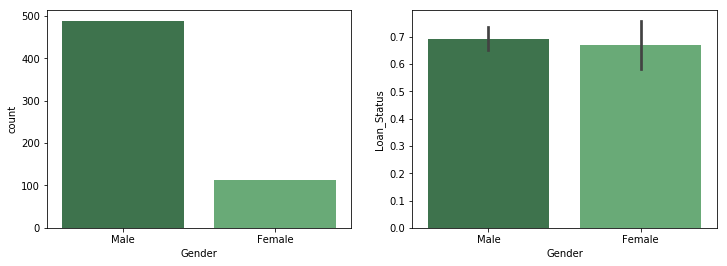

In [11]:
fig,(saxis1,saxis2) = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x="Gender",data = train, palette="Greens_d", ax=saxis1)
sns.barplot(x="Gender", y="Loan_Status", data=train,palette="Greens_d", ax=saxis2)

贷款客户中男性的数量占总数的5/6，但是两者的贷款成功率近似相同。


#### Married

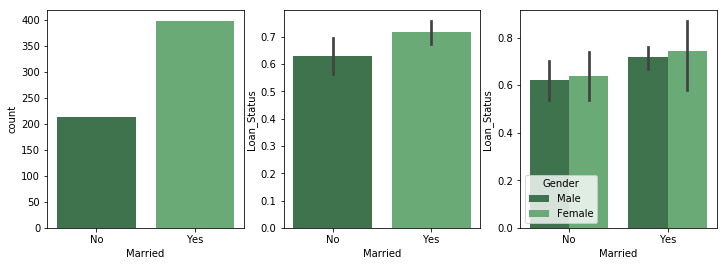

In [12]:
fig,(saxis1,saxis2,saxis3) = plt.subplots(1,3, figsize=(12,4))
sns.countplot(x="Married",data = train, palette="Greens_d", ax=saxis1)
sns.barplot(x="Married", y="Loan_Status", data=train,palette="Greens_d", ax=saxis2)
sns.barplot(x="Married", y="Loan_Status",hue="Gender", data=train,palette="Greens_d", ax=saxis3)

贷款客户中有2/3的客户已婚，已婚的贷款成功率稍稍高于未婚的。

#### Dependents

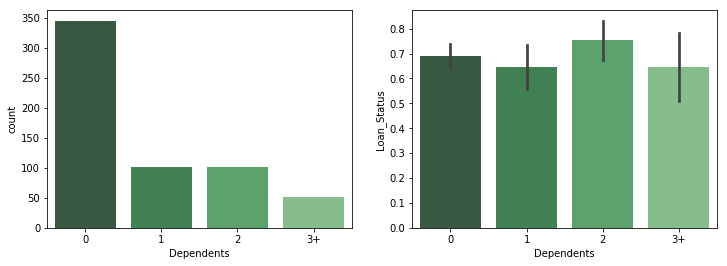

In [13]:
fig,(saxis1,saxis2) = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x="Dependents",data = train, palette="Greens_d", ax=saxis1)
sns.barplot(x="Dependents", y="Loan_Status", data=train,palette="Greens_d", ax=saxis2)

#### Education

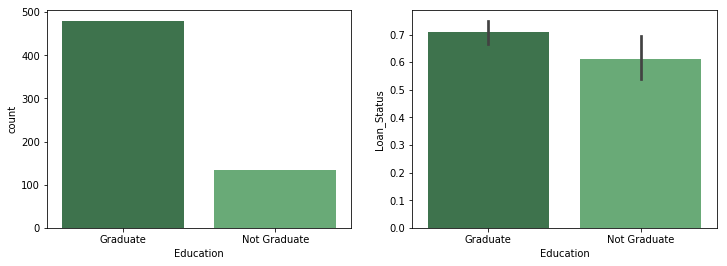

In [14]:
fig,(saxis1,saxis2) = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x="Education",data = train, palette="Greens_d", ax=saxis1)
sns.barplot(x="Education", y="Loan_Status", data=train,palette="Greens_d", ax=saxis2)

申贷客户中已婚的要远远多于未婚的，毕竟婚姻需要房子。申贷成功率方面，已婚的稍稍高于未婚的。

#### Self_Employed

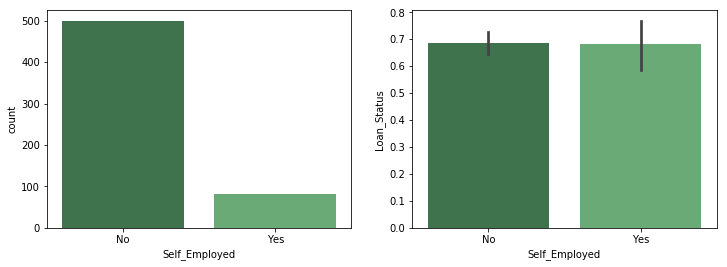

In [15]:
fig,(saxis1,saxis2) = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x="Self_Employed",data = train, palette="Greens_d", ax=saxis1)
sns.barplot(x="Self_Employed", y="Loan_Status", data=train,palette="Greens_d", ax=saxis2)

是不是个体经营户对申贷好像没太大影响，但顾客中绝大部分不是个体经营户。

### ApplicantIncome

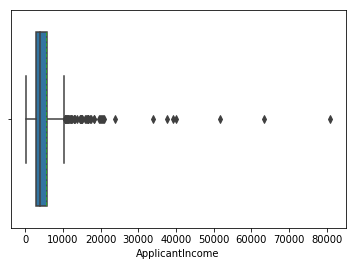

In [16]:
g = sns.boxplot(x = train["ApplicantIncome"],showmeans=True, meanline=True)

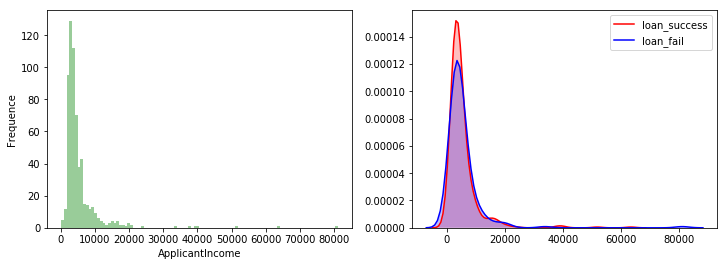

In [30]:
fig,(saxis1,saxis2) = plt.subplots(1,2, figsize=(12,4))
sns.distplot(train["ApplicantIncome"], color="g", ax=saxis1, bins=100,kde = False)
saxis1.set_ylabel("Frequence")
sns.kdeplot(train["ApplicantIncome"][train["Loan_Status"] == 1],color = "red",shade=True,ax=saxis2)
sns.kdeplot(train["ApplicantIncome"][train["Loan_Status"] == 0],color = "blue",shade=True,ax=saxis2)
saxis2.legend(["loan_success","loan_fail"])

客户收入分布是偏态的，但是对货代成功率的影响不是很大。

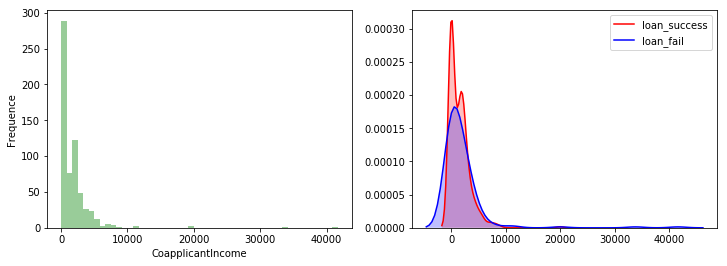

In [31]:
fig,(saxis1,saxis2) = plt.subplots(1,2, figsize=(12,4))
sns.distplot(train["CoapplicantIncome"],color="g",ax= saxis1, kde=False, bins=50)
saxis1.set_ylabel("Frequence")
sns.kdeplot(train["CoapplicantIncome"][train["Loan_Status"] == 1],color = "red",shade=True,ax=saxis2)
sns.kdeplot(train["CoapplicantIncome"][train["Loan_Status"] == 0],color = "blue",shade=True,ax=saxis2)
saxis2.legend(["loan_success","loan_fail"])

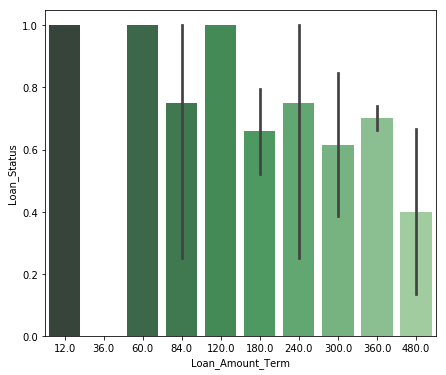

In [32]:
f,ax = plt.subplots(figsize=(7,6))
sns.barplot(x="Loan_Amount_Term", y="Loan_Status", data=train, palette="Greens_d", ax=ax)

贷款期限，贷款的时间越长，获得批准的几率就越低。

In [33]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [34]:
train["Credit_History"].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

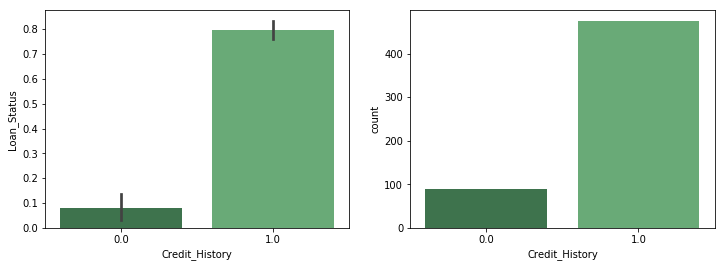

In [35]:
fig,(saxis1,saxis2) = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x="Credit_History", y="Loan_Status", data=train, palette="Greens_d", ax=saxis1)
sns.countplot(x="Credit_History", data=train,palette="Greens_d")


历史信用度良好的客户，获得批准贷款的概率要远远大于信用度不好的客户。这个现象符合常理。

In [36]:
train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

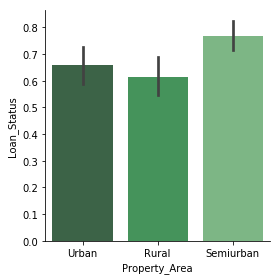

In [37]:
g = sns.factorplot(x="Property_Area", y="Loan_Status", data=train, kind="bar", palette="Greens_d")

经过以上的分析，我发现除了Credit_History,其他属性的信息量很低。

### 数据的简单处理

将train和test集合并一起进行数据处理。
复制一份train对数据特性的相关性进行分析。

In [38]:
train_len = len(train)
dataset = pd.concat([train, test], axis=0).reset_index(drop=True)
train1 = train.copy(deep=True)

下面将字符串类别属性转化为数字型类别属性便于相关性分析和建模输入。

In [39]:
train1["Gender"] = train1["Gender"].map({"Male":1,"Female":0})
train1["Married"] = train1["Married"].map({"Yes":1,
                                            "No":0})
train1["Dependents"] = train1["Dependents"].map({"1":1,
                                                  "2":2,
                                                  "3+":3,
                                                  "0":0})
train1["Education"] = train1["Education"].map({"Graduate":1,
                                                "Not Graduate":0})
train1["Self_Employed"] = train1["Self_Employed"].map({"Yes":1,
                                                        "No":0})
train1["Property_Area"] = train1["Property_Area"].map({"Urban":0,
                                                        "Semiurban":1,
                                                         "Rural":2})

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


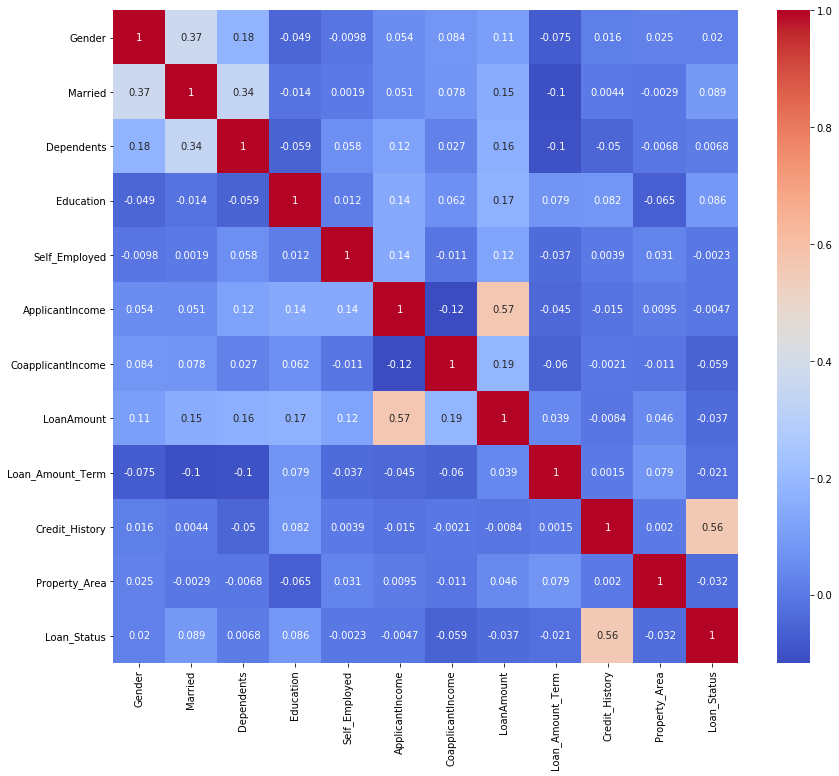

In [41]:
f,ax = plt.subplots(figsize=(14,12))
sns.heatmap(train1.corr(), annot=True, cmap="coolwarm")

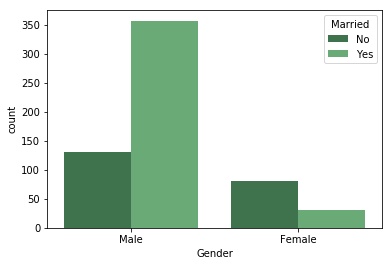

In [42]:
g = sns.countplot(x="Gender", hue="Married", data=train, palette="Greens_d")

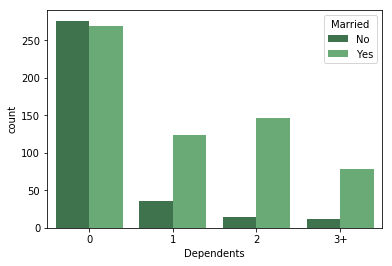

In [43]:
sns.countplot(x="Dependents",hue="Married",data = dataset, palette="Greens_d")

In [44]:
train["Loan_Status"][train["Credit_History"].isnull()].value_counts()

1    37
0    13
Name: Loan_Status, dtype: int64

### Feature Engineering

### Filling the missing value


查看各属性的缺失值情况，我发现以下情况：Credit_History,我猜想Credit_History为Nan的客户为首次贷款，因此历史信用度的记录为零，处理的方式是不填充数据，而是新加一个nohis量，Credit_History变为：0,1,nohis分别代表信用差，信用良好，首次贷款。

对于Married，由于缺失值较小，直接用Married的众数进行填充。

Gender,经过分析，发现Married为Yes的客户中Male居多，而No中，Female居多，因此根据这个规律填充Gender。

Depentents与Married的相关性较高，分析发现，Married为No时，Depentents为0的概率最高，其他情况下我选择了选取这0，1，2，3+随机填充。

Loan_Amount_Term和Self_Employed与其他属性相关性都很低，比较独立的一个属性，因此我选择众数填充。

LoadAmount选用了一些具有相关性的属性利用建模的方式填充了缺失值。

In [45]:
dataset.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

#### Married missing value

In [46]:
dataset["Married"] = dataset["Married"].fillna("Yes")

##### Gender missing value 

In [47]:
dataset.loc[dataset["Gender"].isnull(),"Gender"] = dataset["Married"][dataset["Gender"].isnull()].apply(lambda x: "Male" if x == "Yes" else "Female")

#### Dependents missing value

In [48]:
Dependents_choice = list(dataset["Dependents"].value_counts().index)
dataset.loc[dataset["Dependents"].isnull(),"Dependents"] = dataset["Married"][dataset["Dependents"].isnull()].apply(
lambda x: '0' if x == "No" else np.random.choice(Dependents_choice))

#### Loan_Amount_Term and Self_Employed missing value

In [49]:
dataset["Loan_Amount_Term"] = dataset["Loan_Amount_Term"].fillna(dataset["Loan_Amount_Term"].mode()[0])

In [50]:
dataset["Self_Employed"] = dataset["Self_Employed"].fillna(dataset["Self_Employed"].mode()[0])

#### Credit_History missing value

In [51]:
# I assume that customer whoes Credit_History is NaN loan at first time.so i fill the NaN with 2 refer to no history.
dataset["Credit_History"] = dataset["Credit_History"].fillna("nohis")

In [52]:
dataset.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount            27
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
dtype: int64

In [53]:
dataset.sample(5)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
426,4606,0.0,1,1,Not Graduate,Female,81.0,360.0,LP002367,0.0,No,Rural,No
558,3887,2669.0,1,0,Graduate,Male,162.0,360.0,LP002798,1.0,Yes,Semiurban,No
931,1700,2900.0,0,0,Not Graduate,Male,67.0,360.0,LP002774,NaN,Yes,Urban,No
939,2875,2416.0,0,0,Graduate,Male,95.0,6.0,LP002802,NaN,No,Semiurban,No
802,13083,0.0,1,0,Not Graduate,Male,NaN,360.0,LP002057,NaN,Yes,Rural,No


接下是利用pandas的get_dummies method 进行属性的格式转化。将类别量转化为dummy量。

In [54]:
dataset = pd.get_dummies(dataset, columns = ["Education"], prefix="Ed")
dataset = pd.get_dummies(dataset, columns = ["Gender"])
dataset = pd.get_dummies(dataset, columns = ["Married"])
dataset = pd.get_dummies(dataset, columns = ["Property_Area"], prefix="Area")
dataset = pd.get_dummies(dataset, columns = ["Self_Employed"])

下面看一下目前的数据情况。

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 19 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null object
Dependents           981 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null float64
Ed_Graduate          981 non-null uint8
Ed_Not Graduate      981 non-null uint8
Gender_Female        981 non-null uint8
Gender_Male          981 non-null uint8
Married_No           981 non-null uint8
Married_Yes          981 non-null uint8
Area_Rural           981 non-null uint8
Area_Semiurban       981 non-null uint8
Area_Urban           981 non-null uint8
Self_Employed_No     981 non-null uint8
Self_Employed_Yes    981 non-null uint8
dtypes: float64(4), int64(1), object(3), uint8(11)
memory usage: 71.9+ KB


In [56]:
dataset.sample(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Ed_Graduate,Ed_Not Graduate,Gender_Female,Gender_Male,Married_No,Married_Yes,Area_Rural,Area_Semiurban,Area_Urban,Self_Employed_No,Self_Employed_Yes
419,3246,1417.0,1,0,138.0,360.0,LP002347,1.0,1,0,0,1,0,1,0,1,0,1,0
141,5417,0.0,1,0,168.0,360.0,LP001498,1.0,1,0,0,1,1,0,0,0,1,1,0
105,3052,1030.0,1,1,100.0,360.0,LP001367,1.0,1,0,0,1,0,1,0,0,1,1,0
270,3237,0.0,1,0,30.0,360.0,LP001888,1.0,1,0,1,0,1,0,0,0,1,1,0
685,4463,0.0,1,0,65.0,360.0,LP001368,NaN,1,0,0,1,1,0,0,1,0,1,0
961,2868,0.0,1,0,70.0,360.0,LP002885,NaN,0,1,0,1,1,0,0,0,1,1,0
576,3087,2210.0,0,0,136.0,360.0,LP002872,0.0,1,0,0,1,0,1,0,1,0,1,0
872,3007,3725.0,1,0,151.0,360.0,LP002412,NaN,1,0,0,1,0,1,1,0,0,1,0
489,2435,0.0,1,0,75.0,360.0,LP002556,0.0,1,0,0,1,1,0,0,0,1,1,0
348,6333,4583.0,nohis,0,259.0,360.0,LP002137,1.0,1,0,0,1,0,1,0,1,0,1,0


将没有用的Loan_ID从数据集中去除。
将非数字类目录属性数字化。

In [57]:
dataset.drop(["Loan_ID"], axis=1, inplace=True)
dataset["Credit_History"].value_counts()

1.0      754
0.0      148
nohis     79
Name: Credit_History, dtype: int64

In [58]:
dataset["Credit_History"] = dataset["Credit_History"].replace('nohis', 2.0)
dataset["Dependents"] = dataset["Dependents"].map({"0":0, "1":1, "2":2, "3+":3})

所有属性的相关性热图。

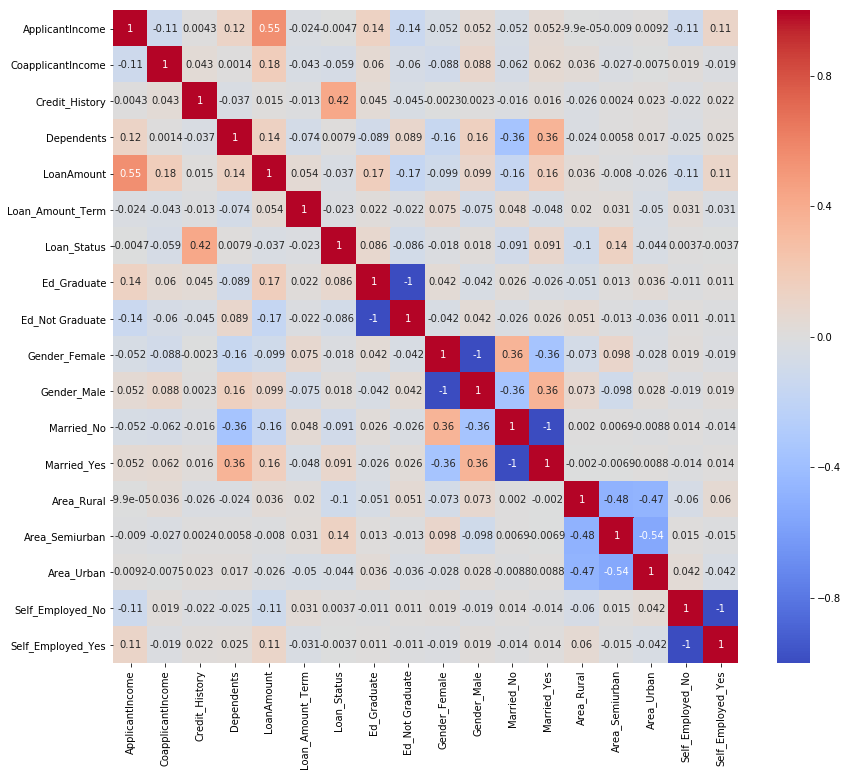

In [59]:
f,ax = plt.subplots(figsize=(14,12))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

建模填充LoanAmount的缺失值。

In [60]:
def fill_missing_feature(data, missing_feature, corr_feature):
    known = data[data[missing_feature].notnull()]
    unknown = data[data[missing_feature].isnull()]

    y = known[missing_feature]

    x = known[corr_feature]

    clf = RandomForestClassifier(random_state=0, n_estimators=2000, n_jobs=-1)

    clf.fit(x,y)

    data.loc[data[missing_feature].isnull(),missing_feature] = clf.predict(unknown[corr_feature])
    print(clf.predict(unknown[corr_feature]))
    return data

In [61]:
dataset = fill_missing_feature(dataset,"LoanAmount",["ApplicantIncome","CoapplicantIncome","Dependents","Ed_Graduate",
                                                    "Married_Yes","Self_Employed_Yes"])

[ 150.   88.  114.   66.  176.  436.  111.  150.  135.   81.  110.   53.
  135.   28.  155.  187.   50.  113.  185.  205.  117.  178.  100.   60.
  143.   61.  180.]


将大尺度数据特征缩放。

In [62]:
std_scaler = StandardScaler()
dataset["ApplicantIncome"] = std_scaler.fit_transform(dataset["ApplicantIncome"])
dataset["CoapplicantIncome"] = std_scaler.fit_transform(dataset["CoapplicantIncome"])
dataset["LoanAmount"] = std_scaler.fit_transform(dataset["LoanAmount"])
dataset["Loan_Amount_Term"] = std_scaler.fit_transform(dataset["Loan_Amount_Term"])

训练集，测试集分离。

In [63]:
train = dataset[:train_len]
test = dataset[train_len:]

特征值和标签值分离。

In [64]:
y_train = train["Loan_Status"]
x_train = train.drop("Loan_Status", axis=1)

## Short -List Promising Modeling

数据准备好了，先选用常见的算法模型标准参数进行预测。

In [65]:
classifiers = [
    #Ensemble Methods
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    #Gaussian Processes
    GaussianProcessClassifier(),
    
    #GLM
    LogisticRegression(),
    PassiveAggressiveClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    Perceptron(),
    
    #Navies Bayes
    BernoulliNB(),
    GaussianNB(),
    
    #Nearest Neighbor
    KNeighborsClassifier(),
    
    #SVM
    SVC(probability=True),
    NuSVC(probability=True),
    LinearSVC(),
    
    #Trees    
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    
    #Discriminant Analysis
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),  
    ]


划分交叉模型便于交叉验证计算精确度。

In [66]:
#split dataset in cross-validation
kfold = StratifiedKFold(n_splits=10)

分别对每个模型进行训练预测，计算精确度。

In [67]:
clf_name = []
cv_results = []
cv_means = []
cv_std = []
for clf in classifiers:
    cv_results.append(cross_val_score(clf, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
    clf_name.append(clf.__class__.__name__)
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":clf_name})
cv_res.sort_values(by="CrossValMeans",ascending=False,inplace=True)
cv_res

,Algorithm,CrossValMeans,CrossValerrors
6,LogisticRegression,0.806167,0.038395
16,LinearSVC,0.806167,0.032314
14,SVC,0.806167,0.032314
8,RidgeClassifierCV,0.804528,0.029375
15,NuSVC,0.801249,0.036661
19,LinearDiscriminantAnalysis,0.801249,0.035921
11,BernoulliNB,0.799558,0.041860
0,AdaBoostClassifier,0.783320,0.032937
5,GaussianProcessClassifier,0.778506,0.031107
3,GradientBoostingClassifier,0.770362,0.051247


使用f1 score来评估模型的性能。

In [69]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
clf_name = []
cv_precision = []
cv_recall = []
cv_f1score = []
for clf in classifiers:
  y_train_pred = cross_val_predict(clf, x_train, y_train, cv=kfold, n_jobs=-1)
  clf_name.append(clf.__class__.__name__)
  cv_precision.append(precision_score(y_train, y_train_pred))
  cv_recall.append(recall_score(y_train, y_train_pred))
  cv_f1score.append(f1_score(y_train, y_train_pred))
cv_res = pd.DataFrame({"clf_name":clf_name,"precision_score":cv_precision,
                      "recall_score":cv_recall,"f1_score":cv_f1score})
cv_res.sort_values(by="f1_score",ascending=False,inplace=True)
cv_res

,clf_name,f1_score,precision_score,recall_score
14,SVC,0.874869,0.786389,0.985782
16,LinearSVC,0.873807,0.790787,0.976303
6,LogisticRegression,0.873807,0.790787,0.976303
8,RidgeClassifierCV,0.872881,0.789272,0.976303
15,NuSVC,0.871308,0.785171,0.978673
19,LinearDiscriminantAnalysis,0.870488,0.788462,0.971564
11,BernoulliNB,0.867884,0.793713,0.957346
5,GaussianProcessClassifier,0.856842,0.770833,0.964455
0,AdaBoostClassifier,0.855277,0.790744,0.931280
3,GradientBoostingClassifier,0.846238,0.783838,0.919431


定义学习曲线函数，便于画学习曲线。

In [70]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

选取简单模型得分较高的几个算法进行优化参数选择。

In [71]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance","exponential"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 1, 0.01,10,5],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1,"auto","sqrt","log2",None]
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(x_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
print(gsGBC.best_score_)
print(GBC_best)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  8.6min finished


0.693811074919
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=100,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=200, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


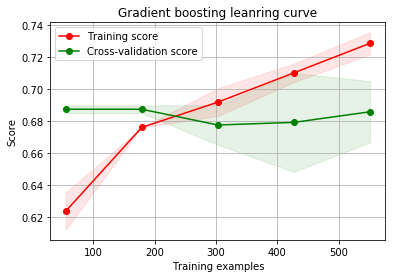

In [74]:
g = plot_learning_curve(GBC_best,'Gradient boosting leanring curve',x_train,y_train,cv=kfold)

In [73]:


### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'],
              'gamma': [ 0.001, 0.01, 0.1, 1],
              'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(x_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
print(gsSVMC.best_score_)
print(SVMC_best)


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.5s


0.811074918567
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   23.2s finished


In [72]:

### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'],
              'gamma': [ 0.001, 0.01, 0.1, 1],
              'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gsSVMC.fit(x_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
print(gsSVMC.best_score_)
print(SVMC_best)



Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.0s


0.877936737238
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   21.5s finished


In [ ]:
g = plot_learning_curve(SVMC_best,'SVC leanring curve',x_train,y_train,cv=kfold)

In [ ]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[3,4,5],
              "learning_rate":  [0.1,0.2,0.3]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(x_train,y_train)

ada_best = gsadaDTC.best_estimator_

print(ada_best)
print(gsadaDTC.best_score_)

In [ ]:
g = plot_learning_curve(ada_best,'AdaBoostClassifier leanring curve',x_train,y_train,cv=kfold)

In [ ]:
# BaggingClassifier
bagclf = BaggingClassifier()
bag_param_grid = {"n_estimators": [20,30,50,60,70],
                 "max_samples": [1,2,3,4,5,6,7,8,9],
                 "max_features":[2,3,4],
                  "n_jobs":[-1]
                 }
gsbag = GridSearchCV(bagclf,param_grid = bag_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsbag.fit(x_train,y_train)
bag_best  = gsbag.best_estimator_
print(bag_best)
print(gsbag.best_score_)

In [ ]:
g = plot_learning_curve(bag_best,'BaggingClassifier leanring curve',x_train,y_train,cv=kfold)


In [ ]:
# RFC Parameters tunning
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [2,3,4],
              "min_samples_split": [9,10,11],
              "min_samples_leaf": [9,10,11],
              "bootstrap": [False],
              "n_estimators" :[300,400,500,450],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(x_train,y_train)

RFC_best = gsRFC.best_estimator_

print(gsRFC.best_score_)
print(RFC_best)

In [ ]:
g = plot_learning_curve(RFC_best,'RandomForestClassifier leanring curve',x_train,y_train,cv=kfold)

In [ ]:
#ExtraTrees
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 8],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(x_train,y_train)

ExtC_best = gsExtC.best_estimator_

print(gsExtC.best_score_)
print(ExtC_best)

In [ ]:
g = plot_learning_curve(ExtC_best,'ExtraTreesClassifier leanring curve',x_train,y_train,cv=kfold)

In [ ]:
# LogisticRegression tunning

rrg = LogisticRegression()
rrg_param_grid = [{"penalty":['l1'], "C":[1.0,0.1,0.5],"solver":["liblinear"],"max_iter":[100,200,300]},
                  {"penalty":['l2'], "C":[1.0,0.1,0.5],"solver":["lbfgs","newton-cg","sag"],"max_iter":[100,200,300]}]

gsrrg = GridSearchCV(rrg,param_grid = rrg_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsrrg.fit(x_train,y_train)

rrg_best = gsrrg.best_estimator_

# Best score
print(gsrrg.best_score_)
print(rrg_best)

In [ ]:
g = plot_learning_curve(rrg_best,'LogisticRegression leanring curve',x_train,y_train,cv=kfold)

In [ ]:
votingclf = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('berno',BernoulliNB()),('rrg',rrg_best)], voting='soft', n_jobs=4)

votingclf.fit(x_train, y_train)

test_Status = pd.Series(votingclf.predict(test).astype(int), name="Loan_Status")

results = pd.concat([testID,test_Status],axis=1)
results["Loan_Status"] = results["Loan_Status"].map({1:"Y",0:"N"})

results.to_csv("loan_prediction.csv",index=False)
print('done')